### Create a Linear Regression Model using for pytorch

In [103]:
import os
from statistics import linear_regression

os.environ["KMP_DUPLICATE_LIB_OK"] = "TRUE"


In [104]:
import torch
from torch import nn
import matplotlib.pyplot as plt


In [105]:
device = "cuda" if torch.cuda.is_available() else "cpu"

In [106]:
device

'cuda'

### LinearRegression Formula:  $ y = weights * x + bias $ 

In [107]:
weight = 0.7
bias = 0.3

# create range values
start = 0
end = 1
step = 0.02

# Create X and Y (features and labels)
X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias

X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [108]:
# split the data
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

In [109]:
len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

In [110]:
def plot_predictions(train_data = X_train, train_labels=y_train, test_data=X_test, test_labels=y_test,predictions=None):
    plt.figure(figsize=(10, 7))
    plt.scatter(train_data, train_labels, c='b', s=4, label="Training_data")

    plt.scatter(test_data, test_labels, c='g', s=4, label="Testing_data")

    if predictions is not None:
        plt.scatter(test_data, predictions, c='r', s=4, label='predictions')
    plt.legend()
    plt.show()


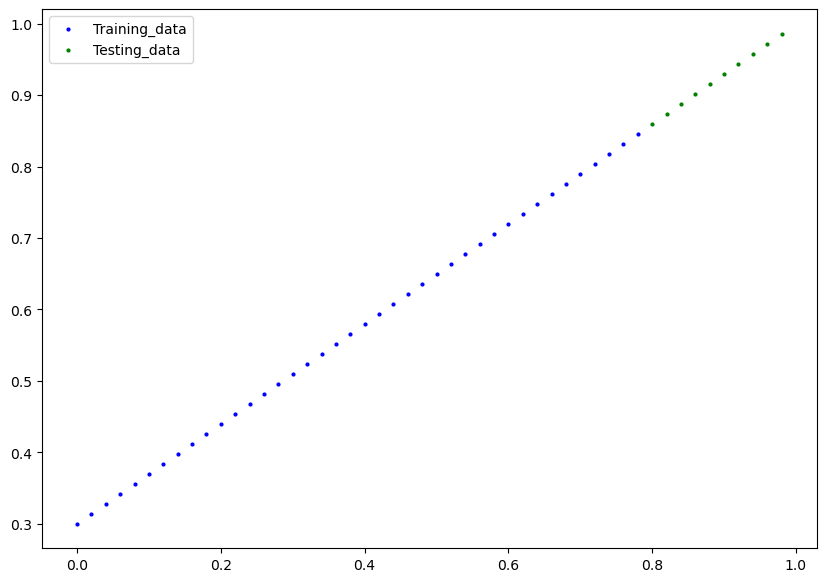

In [111]:
plot_predictions(X_train, y_train, X_test, y_test)

In [112]:
### create a linear model

class LinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear_layer = nn.Linear(in_features=1, out_features=1)
    
    def forward (self, X):
        return self.linear_layer(X)




torch.manual_seed(42)
model = LinearRegressionModel()
model, model.state_dict()

(LinearRegressionModel(
   (linear_layer): Linear(in_features=1, out_features=1, bias=True)
 ),
 OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
              ('linear_layer.bias', tensor([0.8300]))]))

In [113]:
next(model.parameters()).device

device(type='cpu')

In [114]:
model = model.to(device)

In [115]:
next(model.parameters()).device

device(type='cuda', index=0)

## Training

In [116]:
# create loss function

loss_fn = nn.L1Loss()

# create optimizer
optimizer = torch.optim.SGD(params=model.parameters(), lr=0.01)

In [117]:
torch.manual_seed(42)

epochs = 1000

X_train = X_train.to(device)
y_train = y_train.to(device)
X_test = X_test.to(device)
y_test = y_test.to(device)

for epoch in range(epochs):
    # training
    model.train()

    # 2. forward pass
    y_pred = model(X_train)

    # 3. calculate the loss
    train_loss = loss_fn(y_pred, y_train)

    # 4.zero grad optimizer
    optimizer.zero_grad()
    # loss backward
    train_loss.backward()
    # step optimizer
    optimizer.step()

    # testing
    model.eval()
    with torch.no_grad():
        y_pred = model(X_test)
        loss = loss_fn(y_pred, y_test)

    if epoch % 10 == 0:
        print(f'epoch: {epoch} | train_loss: {train_loss} | Test loss: {loss}')



epoch: 0 | train_loss: 0.5551779866218567 | Test loss: 0.5739762187004089
epoch: 10 | train_loss: 0.439968079328537 | Test loss: 0.4392664134502411
epoch: 20 | train_loss: 0.3247582018375397 | Test loss: 0.30455657839775085
epoch: 30 | train_loss: 0.20954833924770355 | Test loss: 0.16984669864177704
epoch: 40 | train_loss: 0.09433845430612564 | Test loss: 0.03513690456748009
epoch: 50 | train_loss: 0.023886388167738914 | Test loss: 0.04784907028079033
epoch: 60 | train_loss: 0.019956795498728752 | Test loss: 0.045803118497133255
epoch: 70 | train_loss: 0.016517987474799156 | Test loss: 0.037530567497015
epoch: 80 | train_loss: 0.013089174404740334 | Test loss: 0.02994490973651409
epoch: 90 | train_loss: 0.009653178043663502 | Test loss: 0.02167237363755703
epoch: 100 | train_loss: 0.006215683650225401 | Test loss: 0.014086711220443249
epoch: 110 | train_loss: 0.00278724217787385 | Test loss: 0.005814164876937866
epoch: 120 | train_loss: 0.0012645035749301314 | Test loss: 0.013801801018

In [118]:
model.eval()
with torch.inference_mode():
    y_pred = model(X_test)
y_pred


tensor([[0.8600],
        [0.8739],
        [0.8878],
        [0.9018],
        [0.9157],
        [0.9296],
        [0.9436],
        [0.9575],
        [0.9714],
        [0.9854]], device='cuda:0')

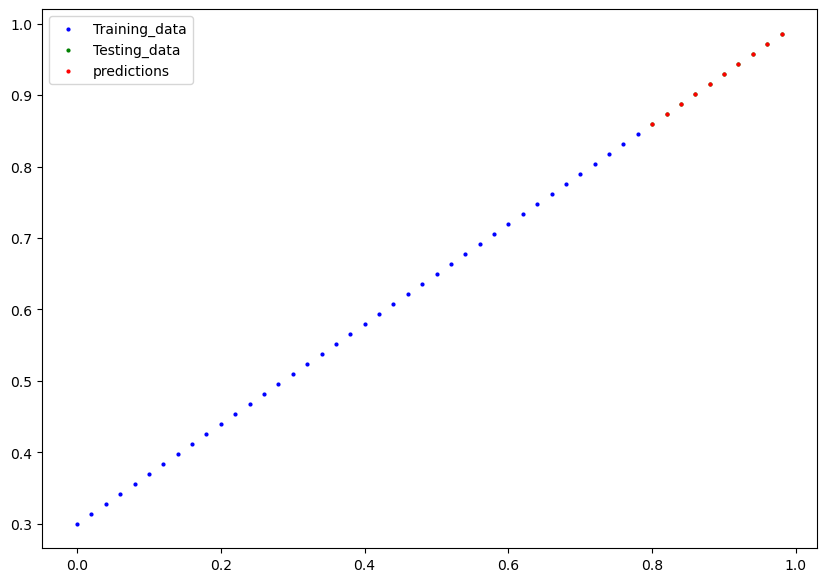

In [119]:
plot_predictions(predictions=y_pred.cpu())

In [120]:
torch.save(model.state_dict(), "linear_regression.pth")

In [121]:
model.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.6968]], device='cuda:0')),
             ('linear_layer.bias', tensor([0.3025], device='cuda:0'))])

In [125]:
model = LinearRegressionModel()
model.load_state_dict(torch.load("linear_regression.pth"))
model.eval()

C:\Users\vikram\AppData\Local\Temp\ipykernel_22828\1825598273.py:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load("linear_regression.pth"))


LinearRegressionModel(
  (linear_layer): Linear(in_features=1, out_features=1, bias=True)
)